In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### dir setting

In [0]:
dir = '/content/drive/My Drive/Colab Notebooks/data'

## game tag filtering

In [0]:
game = pd.read_csv (dir + '/game_list.csv', encoding = 'utf-8', header = 0)
tag = pd.read_csv (dir + '/game_tag.csv', encoding = 'utf-8', header = 0)

In [0]:
game = game.sort_values(by = 'review_count', axis = 0, ascending = False)
game = game[game['review_count'] > 500]
tag = tag['game_id'].unique()
len_before = len(game)
game = game[game['game_id'].isin(tag)]
len_after = len(game)
print (len_before, "->", len_after)
print ("No Tag: ", "%.3f"%((len_before - len_after) / len_before * 100) , "%")

3506 -> 3398
No Tag:  3.080 %


In [0]:
game = game.reset_index(drop = True)
game

,game_id,game_title,review_count
0,730,Counter-Strike: Global Offensive,2469314
1,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,988416
2,271590,Grand Theft Auto V,528396
3,359550,Tom Clancy's Rainbow Six Siege,373589
4,4000,Garry's Mod,368868
...,...,...,...
3393,201290,Sins of a Solar Empire: Trinity,502
3394,47000,4 Elements,502
3395,636100,Tesla vs Lovecraft,501
3396,400180,Okhlos: Omega,501


In [ ]:
game.to_csv (dir + "./game_list_valid.csv", encoding = 'utf-8', index = False, columns = ['game_id', 'review_count'])

## game play scoring

In [0]:
df_pt = pd.read_csv (dir + '/user_playtime_filtered.csv', encoding = 'utf-8', header = 0)
df_vt = pd.read_csv (dir +'/user_vote_filtered.csv', encoding = 'utf-8', header = 0)

In [0]:
df_pt

,user_id,game_id,play_time
0,76561198077358609,4000,13730
1,76561198077358609,400,0
2,76561198077358609,10500,775
3,76561198077358609,48700,23790
4,76561198077358609,33900,129
...,...,...,...
2219187,76561198075128862,8500,311
2219188,76561198075128862,564710,216
2219189,76561198075128862,588950,124
2219190,76561198075128862,597220,1090


In [0]:
df_vt

,user_id,game_id,vote
0,76561198077358609,238430,1
1,76561198077358609,401190,1
2,76561198077358609,203770,1
3,76561198077358609,226700,1
4,76561198077358609,304930,1
...,...,...,...
265499,76561198097648329,207610,1
265500,76561198097648329,214560,1
265501,76561198097648329,211400,1
265502,76561198097648329,203160,1


In [0]:
alpha = 1
my_df = pd.merge (df_pt, df_vt, how = 'outer', on = ['game_id', 'user_id'])
my_df = my_df.fillna(0)
my_df = my_df [(my_df['play_time'] != 0)]
my_df['score'] = np.log10 (my_df['play_time']+1) #+my_df['vote'] * alpha
my_df = my_df.reset_index(drop = True)
my_df

,user_id,game_id,play_time,vote,score
0,76561198077358609,4000,13730.0,0.0,4.137702
1,76561198077358609,10500,775.0,0.0,2.889862
2,76561198077358609,48700,23790.0,1.0,4.376413
3,76561198077358609,33900,129.0,0.0,2.113943
4,76561198077358609,33930,4637.0,1.0,3.666331
...,...,...,...,...,...
1509802,76561198075128862,8500,311.0,0.0,2.494155
1509803,76561198075128862,564710,216.0,0.0,2.336460
1509804,76561198075128862,588950,124.0,0.0,2.096910
1509805,76561198075128862,597220,1090.0,0.0,3.037825


In [0]:
my_df['vote'].value_counts()

 0.0    1261852
 1.0     207913
-1.0      40042
Name: vote, dtype: int64

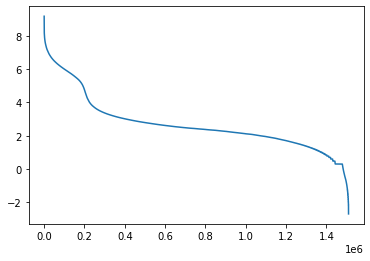

In [0]:
plt.plot (my_df.index, my_df.sort_values(by = 'score', ascending = False)['score'])

In [0]:
split_n = 5
cut = [-100]
for i in range (1, split_n) :
    cut.append (np.percentile (my_df['score'], 100 * i / split_n))

cut

[-100,
 1.7481880270062005,
 2.250420002308894,
 2.5575072019056577,
 3.0178677189635055]

In [0]:
def f_cut (x) :
    for i in range(split_n) :
        if x <= cut[i] :
            return i
    return split_n
my_df['rating'] = my_df['score'].apply(f_cut)
my_df

,user_id,game_id,play_time,vote,score,rating
0,76561198077358609,4000,13730.0,0.0,4.137702,5
1,76561198077358609,10500,775.0,0.0,2.889862,4
2,76561198077358609,48700,23790.0,1.0,4.376413,5
3,76561198077358609,33900,129.0,0.0,2.113943,2
4,76561198077358609,33930,4637.0,1.0,3.666331,5
...,...,...,...,...,...,...
1509802,76561198075128862,8500,311.0,0.0,2.494155,3
1509803,76561198075128862,564710,216.0,0.0,2.336460,3
1509804,76561198075128862,588950,124.0,0.0,2.096910,2
1509805,76561198075128862,597220,1090.0,0.0,3.037825,5


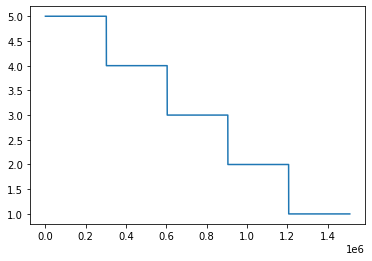

In [0]:
plt.plot (my_df.index, my_df.sort_values(by = 'rating', ascending = False)['rating'])

## CF

In [0]:
!pip install surprise

     |████████████████████████████████| 6.5MB 2.8MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1675390 sha256=84dad1464ff3d86eed4b380c76ec660661d84e2099bc0c8e1ac8dc8e29a81ab1
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [0]:
import surprise
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise.model_selection import train_test_split
from surprise import accuracy

In [0]:
# A reader is still needed but only the rating_scale param is required.
reader = Reader(rating_scale=(1, len(my_df)))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(my_df[['user_id', 'game_id', 'rating']], reader)

In [0]:
bsl_options = {
    'method': 'als',
    'n_epochs': 5,
    'reg_u': 12,
    'reg_i': 5
}
sim_options = {
    'user_based' : False
}

algo = surprise.BaselineOnly(bsl_options = bsl_options)

In [0]:
bsl_options = {'method': 'als',
               'n_epochs': 20,
               }
sim_options = {'name': 'pearson_baseline'}
algo = surprise.KNNBasic(bsl_options=bsl_options, sim_options=sim_options)

In [0]:
algo = surprise.SVD()

In [0]:
algo = surprise.NormalPredictor()

In [0]:
# We can now use this dataset as we please, e.g. calling cross_validate
cross_validate(algo, data, cv=2)

Estimating biases using als...
Estimating biases using als...


{'fit_time': (2.0550625324249268, 2.5966358184814453),
 'test_mae': array([1.03184281, 1.03206178]),
 'test_rmse': array([1.25263362, 1.2518433 ]),
 'test_time': (6.360442399978638, 6.25161337852478)}

In [0]:
trainset, testset = train_test_split(data, test_size=.25)

In [0]:
algo.fit(trainset)
predictions = algo.test(testset)

In [0]:
pr = [{'user_id' : i.uid, 'game_id' : i.iid, 'r' : i.est} for i in predictions]
df_pr = pd.DataFrame (pr, columns = ['user_id', 'game_id', 'r'])
df = pd.merge (my_df, df_pr, how = 'right', on = ['game_id', 'user_id'])
df['r'] = df['r'].apply (np.around)

In [0]:
len(df[df['r'] == df['rating']]) / len (df)

0.3233020357555398

In [0]:
accuracy.rmse(predictions, verbose=True)

RMSE: 1.2080


1.2080217006124299

## Classification Form

In [0]:
game_list = my_df['game_id'].drop_duplicates().reset_index (drop = True)
user_list = my_df['user_id'].drop_duplicates().reset_index (drop = True)
tag = pd.read_csv (dir + '/game_tag.csv', encoding = 'utf-8', header = 0)

In [0]:
tag['p'] = 1
tag = pd.pivot_table(tag, index = 'game_id', columns = 'tag', values = 'p', aggfunc = np.mean).fillna(0)

In [0]:
game = pd.merge (game_list, tag, how = 'left', on = ['game_id'])
game_pt = pd.pivot_table(df_pt, index = 'game_id', columns = 'user_id', values = 'play_time', aggfunc = np.mean).fillna(0)

a = game_pt[game_pt > 120]

pt_Q3 = a.quantile (0.75, axis = 1)
pt_Q2 = a.quantile (0.5, axis = 1)
pt_Q1 = a.quantile (0.25, axis = 1)

game_pt ['Q3_pt'] = pt_Q3
game_pt ['Q2_pt'] = pt_Q2
game_pt ['Q1_pt'] = pt_Q1

game_pt ['120_player_num'] = np.sum ((game_pt > 120), axis = 1)
game = pd.merge (game, game_pt[['120_player_num', 'Q3_pt', 'Q2_pt', 'Q1_pt']], how = 'left', on = ['game_id'])
game

,game_id,1980s,1990's,2.5D,2D,2D Fighter,2D Platformer,360 Video,3D,3D Fighter,3D Platformer,3D Vision,4 Player Local,4X,6DOF,ATV,Abstract,Action,Action RPG,Action-Adventure,Addictive,Adventure,Agriculture,Aliens,Alternate History,America,Animation & Modeling,Anime,Arcade,Archery,Arena Shooter,Artificial Intelligence,Assassin,Asymmetric VR,Asynchronous Multiplayer,Atmospheric,Audio Production,Auto Battler,Automation,Automobile Sim,...,Transhumanism,Transportation,Trivia,Turn-Based,Turn-Based Combat,Turn-Based Strategy,Turn-Based Tactics,Tutorial,Twin Stick Shooter,Typing,Underground,Underwater,Unforgiving,Utilities,VR,Vampire,Vehicular Combat,Video Production,Villain Protagonist,Violent,Visual Novel,Voice Control,Voxel,Walking Simulator,War,Wargame,Warhammer 40K,Web Publishing,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,eSports,120_player_num,Q3_pt,Q2_pt,Q1_pt
0,4000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5531,14795.25,3253.5,683.75
1,10500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,717,3906.00,1061.5,297.50
2,48700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1924,8267.00,2447.0,528.00
3,33900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,140,1101.00,509.0,237.00
4,33930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,852,4209.00,919.0,326.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3184,1094780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,5619.50,2834.0,2111.50
3185,619290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,7633.00,1488.0,348.25
3186,623880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,950.00,209.0,194.00
3187,285380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [0]:
cluster = pd.read_csv (dir + '/game_cluster.csv', encoding = 'utf-8', header = 0)

In [0]:
user = pd.merge (my_df, cluster, how = 'left', on = ['game_id'])
user_pt = pd.pivot_table (user, index = 'user_id', columns = 'cluster', values = 'play_time', aggfunc = np.sum).add_prefix ("cluster_pt_")
user_sc = pd.pivot_table (user, index = 'user_id', columns = 'cluster', values = 'score', aggfunc = np.mean).add_prefix ("cluster_sc_")

In [0]:
df = pd.merge (my_df, user_pt, how = 'left', on = ['user_id'])
df = pd.merge (df, user_sc, how = 'left', on = ['user_id'])
df = pd.merge (df, game, how = 'left', on = ['game_id'])

In [0]:
df = df.drop (columns = ['play_time', 'user_id', 'game_id', 'vote', 'score']).fillna(0)

In [0]:
df

,rating,cluster_pt_0,cluster_pt_1,cluster_pt_2,cluster_pt_3,cluster_pt_4,cluster_pt_5,cluster_pt_6,cluster_pt_7,cluster_pt_8,cluster_pt_9,cluster_pt_10,cluster_pt_11,cluster_pt_12,cluster_pt_13,cluster_sc_0,cluster_sc_1,cluster_sc_2,cluster_sc_3,cluster_sc_4,cluster_sc_5,cluster_sc_6,cluster_sc_7,cluster_sc_8,cluster_sc_9,cluster_sc_10,cluster_sc_11,cluster_sc_12,cluster_sc_13,1980s,1990's,2.5D,2D,2D Fighter,2D Platformer,360 Video,3D,3D Fighter,3D Platformer,3D Vision,...,Transhumanism,Transportation,Trivia,Turn-Based,Turn-Based Combat,Turn-Based Strategy,Turn-Based Tactics,Tutorial,Twin Stick Shooter,Typing,Underground,Underwater,Unforgiving,Utilities,VR,Vampire,Vehicular Combat,Video Production,Villain Protagonist,Violent,Visual Novel,Voice Control,Voxel,Walking Simulator,War,Wargame,Warhammer 40K,Web Publishing,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,eSports,120_player_num,Q3_pt,Q2_pt,Q1_pt
0,5,0.0,293546.0,1258.0,2027.0,0.0,33550.0,114470.0,0.0,7297.0,0.0,0.0,1156.0,1145.0,27293.0,0.000000,2.89365,2.521916,2.898062,0.000000,3.011542,3.334615,0.000000,2.422837,0.0,0.0,2.011389,1.967243,3.597884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5531,14795.25,3253.5,683.75
1,4,0.0,293546.0,1258.0,2027.0,0.0,33550.0,114470.0,0.0,7297.0,0.0,0.0,1156.0,1145.0,27293.0,0.000000,2.89365,2.521916,2.898062,0.000000,3.011542,3.334615,0.000000,2.422837,0.0,0.0,2.011389,1.967243,3.597884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,717,3906.00,1061.5,297.50
2,5,0.0,293546.0,1258.0,2027.0,0.0,33550.0,114470.0,0.0,7297.0,0.0,0.0,1156.0,1145.0,27293.0,0.000000,2.89365,2.521916,2.898062,0.000000,3.011542,3.334615,0.000000,2.422837,0.0,0.0,2.011389,1.967243,3.597884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1924,8267.00,2447.0,528.00
3,2,0.0,293546.0,1258.0,2027.0,0.0,33550.0,114470.0,0.0,7297.0,0.0,0.0,1156.0,1145.0,27293.0,0.000000,2.89365,2.521916,2.898062,0.000000,3.011542,3.334615,0.000000,2.422837,0.0,0.0,2.011389,1.967243,3.597884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,140,1101.00,509.0,237.00
4,5,0.0,293546.0,1258.0,2027.0,0.0,33550.0,114470.0,0.0,7297.0,0.0,0.0,1156.0,1145.0,27293.0,0.000000,2.89365,2.521916,2.898062,0.000000,3.011542,3.334615,0.000000,2.422837,0.0,0.0,2.011389,1.967243,3.597884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,852,4209.00,919.0,326.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509802,3,21515.0,14405.0,1254.0,13674.0,866.0,12037.0,80799.0,3045.0,21558.0,0.0,0.0,0.0,876.0,38906.0,2.808638,2.72037,2.200213,3.215365,2.938019,2.099735,2.987545,1.966957,2.769646,0.0,0.0,0.000000,2.943000,3.341313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,478,5588.00,927.0,260.50
1509803,3,21515.0,14405.0,1254.0,13674.0,866.0,12037.0,80799.0,3045.0,21558.0,0.0,0.0,0.0,876.0,38906.0,2.808638,2.72037,2.200213,3.215365,2.938019,2.099735,2.987545

In [0]:
df_ = df.sample(n = 80000)

In [0]:
X = df_.iloc[:, 1:]
y = df_['rating']

## Classification

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [0]:
dt = DecisionTreeClassifier()

In [0]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
accuracy_score(dt.predict(X_test), y_test)

0.3180625

In [0]:
np.sqrt(mean_squared_error(y_true = dt.predict(X_test), y_pred = y_test))

1.6719748801940777

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(random_state= 1)

In [0]:
rf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [0]:
accuracy_score(y_test, rf.predict(X_test))

0.4137176200978931

In [0]:
from xgboost import XGBClassifier

In [0]:
xgb = XGBClassifier(random_states=1)

In [ ]:
accuracy_score(y_test, xgb.predict(X_test))

In [0]:
!pip install hyperopt

In [0]:
from hyperopt import fmin, tpe, hp
from sklearn.model_selection import cross_val_score

# 초모수 탐색공간 정의
param_space = {'max_depth': hp.quniform('max_depth', 2, 10, 1),
               'subsample': hp.uniform('subsample', 0.1, 0.9)}

# 목적함수 정의
def objective(params):
    params = {'max_depth': int(params['max_depth']),
              'subsample': params['subsample']}
    xgb_clf = XGBClassifier(n_estimators=20, **params) 
    best_score = cross_val_score(xgb_clf, X_train, y_train, 
                                 scoring='accuracy', 
                                 cv=5, 
                                 n_jobs=8).mean()
    loss = 1 - best_score
    return loss

# 알고리즘 실행
best = fmin(fn=objective, space=param_space, 
            max_evals=10, 
            rstate=np.random.RandomState(777), 
            algo=tpe.suggest)
print(best)

100%|██████████| 10/10 [08:44<00:00, 50.39s/it, best loss: 0.18642193694591547]
{'max_depth': 9.0, 'subsample': 0.6383870484708831}


In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [0]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.5185

In [0]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.344

In [0]:
rf = RandomForestClassifier(random_state= 1, n_estimators=20, n_jobs=4)
rf.fit(X_train, y_train)
accuracy_score(y_test, rf.predict(X_test))

0.43691921500056297

In [0]:
y_pred = rf.predict(X_test)

In [0]:
def f(x) :
    if 5 > x > 1:
      return 2
    elif x == 1:
      return 1
    else:
      return 3

accuracy_score(np.array([f(xi) for xi in y_test]), np.array([f(xi) for xi in y_pred]))

0.604337631887456

In [0]:
X_train_, X_valid, y_train_, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state=10)

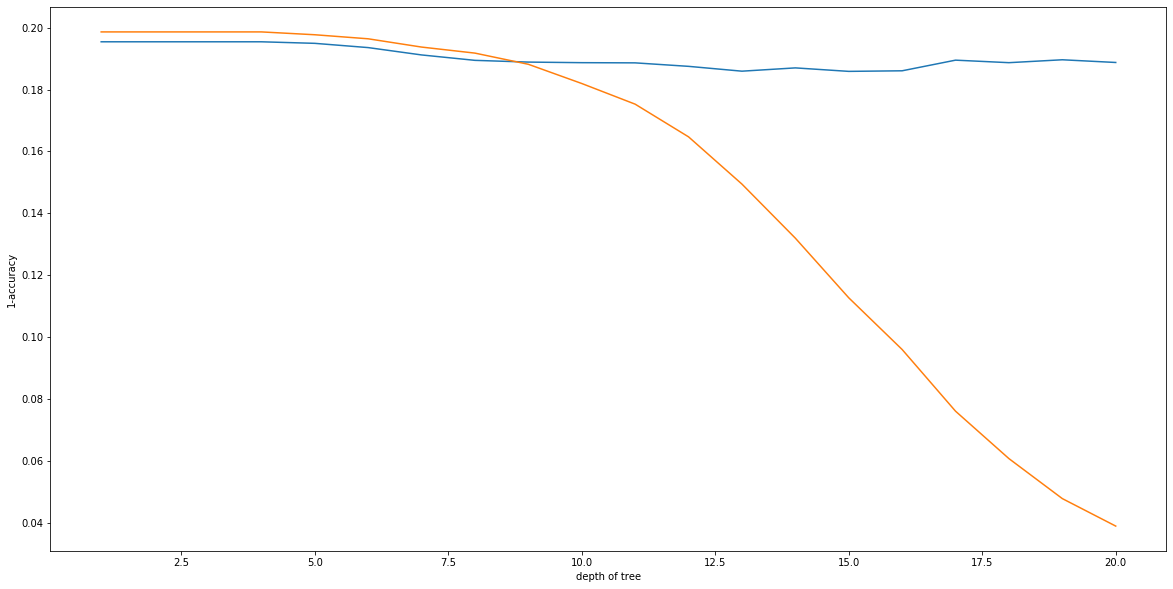

In [0]:
X = []
valid = []
train = []

for i in range(1,21) :
    rf = RandomForestClassifier(random_state=1, n_estimators=20, n_jobs=4, max_depth=i)
    rf.fit(X_train_, y_train_)
    X.append(i)
    train.append(1 - accuracy_score(y_train_, rf.predict(X_train_)))
    valid.append(1 - accuracy_score(y_valid, rf.predict(X_valid)))
    
plt.figure(figsize=(20,10))
plt.xlabel('depth of tree')
plt.ylabel('1-accuracy')
# plt.title('ROC Curve')
plt.plot(X, valid)
plt.plot(X, train)
plt.show()

In [0]:
def f(x) :
    return 2 if x > 1 else 1
df_['rating'] = df_['rating'].map(lambda x: f(x))
df_

,rating,cluster_pt_0,cluster_pt_1,cluster_pt_2,cluster_pt_3,cluster_pt_4,cluster_pt_5,cluster_pt_6,cluster_pt_7,cluster_pt_8,cluster_pt_9,cluster_pt_10,cluster_pt_11,cluster_pt_12,cluster_pt_13,cluster_sc_0,cluster_sc_1,cluster_sc_2,cluster_sc_3,cluster_sc_4,cluster_sc_5,cluster_sc_6,cluster_sc_7,cluster_sc_8,cluster_sc_9,cluster_sc_10,cluster_sc_11,cluster_sc_12,cluster_sc_13,1980s,1990's,2.5D,2D,2D Fighter,2D Platformer,360 Video,3D,3D Fighter,3D Platformer,3D Vision,...,Transhumanism,Transportation,Trivia,Turn-Based,Turn-Based Combat,Turn-Based Strategy,Turn-Based Tactics,Tutorial,Twin Stick Shooter,Typing,Underground,Underwater,Unforgiving,Utilities,VR,Vampire,Vehicular Combat,Video Production,Villain Protagonist,Violent,Visual Novel,Voice Control,Voxel,Walking Simulator,War,Wargame,Warhammer 40K,Web Publishing,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,eSports,120_player_num,Q3_pt,Q2_pt,Q1_pt
798818,1,0.0,12916.0,0.0,0.0,449.0,252.0,828.0,17.0,1776.0,0.0,77.0,478.0,664.0,1387.0,0.000000,2.028535,0.000000,0.000000,1.283834,2.403121,2.591009,1.255273,1.694924,0.000000,1.892095,1.849589,1.627322,2.338401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178,751.00,341.0,195.00
509460,2,533.0,72579.0,789.0,1291.0,4775.0,3679.0,22765.0,7745.0,17849.0,1330.0,11012.0,10474.0,26832.0,50901.0,2.426770,2.533846,2.587959,2.183848,2.465261,2.240047,2.619265,2.330349,2.430843,2.579467,2.243118,2.221925,2.129941,2.358936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1315,565.25,271.0,189.00
985709,1,0.0,20459.0,4076.0,1160.0,425.0,1011.0,0.0,723.0,3709.0,88.0,2618.0,1574.0,2481.0,11641.0,0.000000,2.223892,1.696729,3.064832,1.814467,2.292569,0.000000,1.683942,1.956080,1.949390,2.524986,2.610926,2.058726,2.231284,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,329,720.25,477.5,355.00
1439537,1,3152.0,17.0,1106.0,3333.0,585.0,2098.0,157.0,6161.0,3153.0,0.0,7934.0,6141.0,9593.0,19090.0,2.119241,0.840621,1.525917,2.068237,2.294617,1.856195,1.138363,2.617864,2.494684,0.000000,2.246122,2.617717,2.529309,2.506819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,899,1019.25,408.5,196.00
983108,2,50237.0,2246.0,8291.0,23978.0,2000.0,7423.0,21606.0,30344.0,33941.0,10163.0,12809.0,9714.0,16633.0,70940.0,2.368815,2.170331,1.956042,2.309810,2.096588,2.081465,2.370902,2.179171,2.192907,2.170613,2.134997,2.263243,2.011895,2.355975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250,314.50,222.0,181.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203517,2,686.0,22922.0,2222.0,148.0,2025.0,0.0,19694.0,2019.0,4161.0,589.0,866.0,6540.0,16638.0,32438.0,2.336266,2.848273,2.095269,1.696305,2.402513,0.000000,2.836378,1.756396,2.037522,1.824413,2.482497,2.728819,2.645160,2.830498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4655,4846.00,1658.0,492.75
232977,2,5004.0,232543.0,1416.0,11248.0,2313.0,35806.0

In [0]:
X = df_.iloc[:, 1:]
y = df_['rating'] - 1

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=1)

In [0]:
xgb = XGBClassifier(random_state= 1, max_depth=15)
xgb.fit(x_train, y_train)
accuracy_score(y_test, xgb.predict(x_test))

0.81295

In [0]:
rf = RandomForestClassifier(random_state= 1, n_estimators=20, n_jobs=4, max_depth=15)
rf.fit(x_train, y_train)
accuracy_score(y_test, rf.predict(x_test))

0.806375

In [0]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
accuracy_score(y_test, dt.predict(x_test))

0.736625

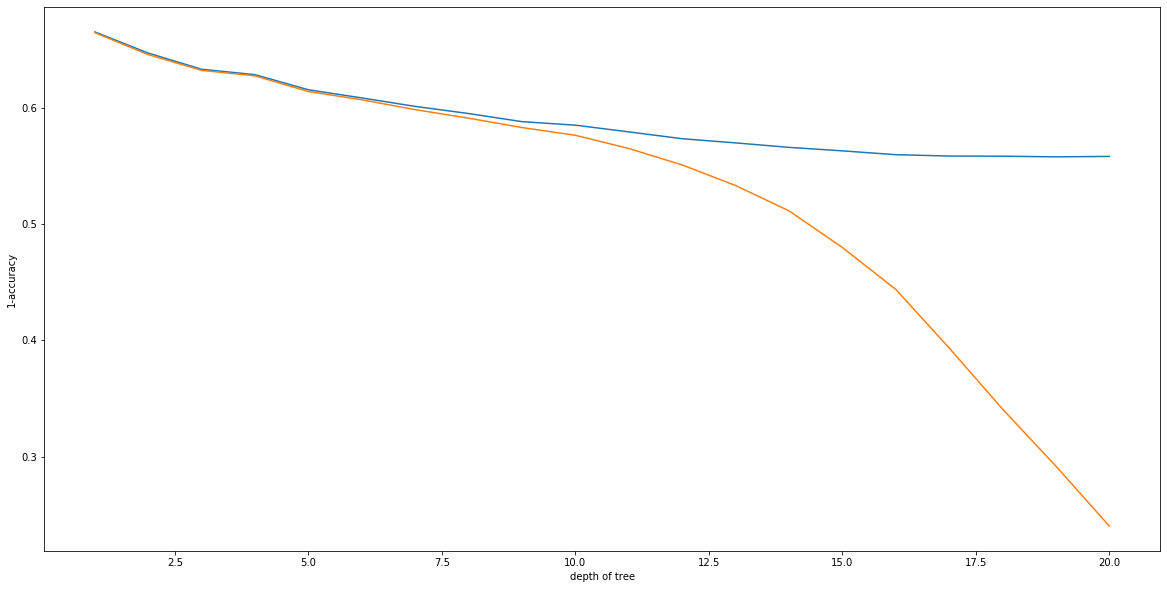

In [0]:
X = []
valid = []
train = []

for i in range(1,21) :
    rf = RandomForestClassifier(random_state=1, n_estimators=20, n_jobs=4, max_depth=i)
    rf.fit(x_train, y_train)
    X.append(i)
    train.append(1 - accuracy_score(y_train, rf.predict(x_train)))
    valid.append(1 - accuracy_score(y_test, rf.predict(x_test)))
    
plt.figure(figsize=(20,10))
plt.xlabel('depth of tree')
plt.ylabel('1-accuracy')
# plt.title('ROC Curve')
plt.plot(X, valid)
plt.plot(X, train)
plt.show()

In [0]:
from sklearn.metrics import confusion_matrix

conf_matrix = pd.DataFrame(
    confusion_matrix(y_test, rf.predict(X_test)),
    columns=['Pred 1', 'Pred 2', 'Pred 3', 'Pred 4', 'Pred 5'],
    index=['True 1', 'True 2', 'True 3', 'True 4', 'True 5'])

conf_matrix

,Pred 1,Pred 2,Pred 3,Pred 4,Pred 5
True 1,33672,10043,5044,6197,5711
True 2,16525,19061,10507,7562,6633
True 3,9649,11606,22887,9613,6503
True 4,9627,7921,10260,19240,13411
True 5,5572,3876,3679,10090,37073


In [0]:
fpr, tpr, _ = roc_curve(y_test, xgb.predict_proba(x_test)[:,1])

In [0]:
xgb.predict_proba(x_test)

array([[0.54989976, 0.45010024],
       [0.02989459, 0.9701054 ],
       [0.06580979, 0.9341902 ],
       ...,
       [0.7097609 , 0.29023907],
       [0.06204563, 0.93795437],
       [0.03745884, 0.96254116]], dtype=float32)

ROC AUC: 0.78


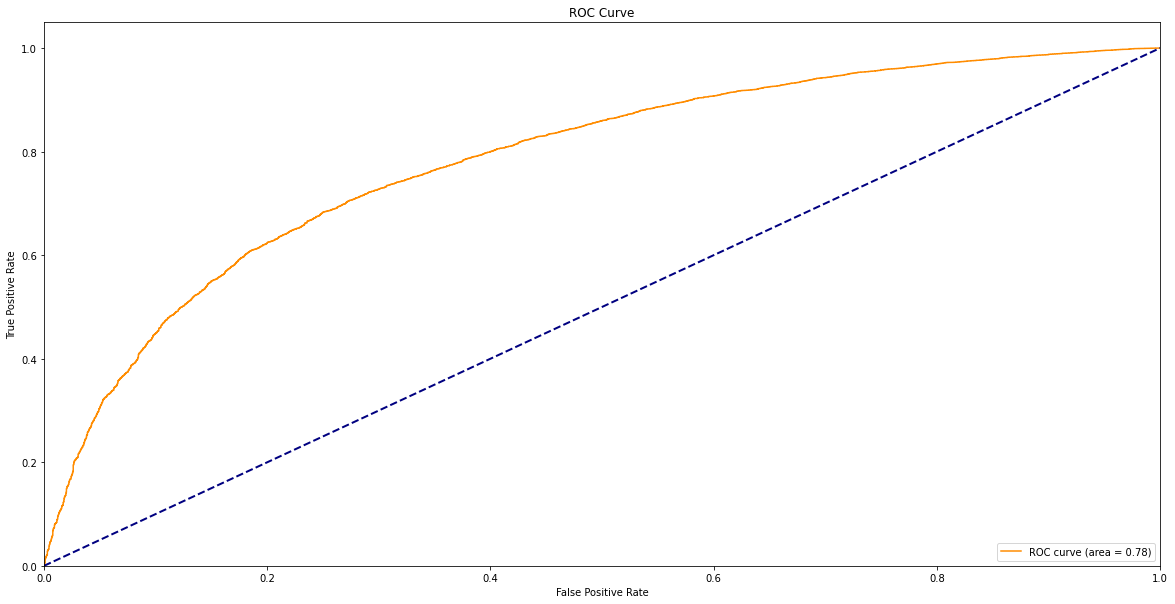

In [0]:
from sklearn.metrics import roc_curve, auc

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure(figsize=(20,10))
# plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()